<a href="https://colab.research.google.com/github/SanjibanRoy/NCMRWF_HandsOn/blob/main/hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python Libraries for Meteorologists
In this notebook, we will explore essential Python libraries used in meteorology and geospatial data analysis:

- **NumPy**: Numerical computations.
- **Pandas**: Tabular data analysis.
- **Matplotlib**: Visualization.
- **Xarray**: Working with multi-dimensional labeled data.
- **GDAL**: Handling raster and vector geospatial data.

We will conclude with an example of generating a meteogram from meteorological data.

## 1. NumPy: Numerical Python
**NumPy** is the core library for numerical operations in Python.

### Key Functions:
- `mean`: Compute the average of an array.
- `mode`: Requires `scipy.stats` to compute the most frequent value.
- Other operations: Standard deviation, sum, and element-wise arithmetic.

### Example:

In [1]:
import numpy as np
from scipy.stats import mode

# Sample data
data = np.array([1, 2, 2, 3, 4, 4, 4, 5])

# Calculate mean, median, and mode
mean = np.mean(data)
median = np.median(data)

print(f"Mean: {mean}")
print(f"Median: {median}")

# Basic arithmetic operations
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])

print("Element-wise addition:", array1 + array2)
print("Element-wise multiplication:", array1 * array2)

Mean: 3.125
Median: 3.5
Element-wise addition: [5 7 9]
Element-wise multiplication: [ 4 10 18]


## 2. Pandas: Data Analysis Library
**Pandas** is used for handling tabular data with labeled axes.

### Example:

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    "Date": ["2024-01-01", "2024-01-02", "2024-01-03"],
    "Temperature": [12.5, 15.0, 10.0],
    "Humidity": [80, 75, 85]
}
df = pd.DataFrame(data)
print("DataFrame:")
print(df)

# Add a calculated column
df['Dew Point'] = df['Temperature'] - ((100 - df['Humidity']) / 5)

# Display updated DataFrame
print("\nUpdated DataFrame:")
print(df)

DataFrame:
         Date  Temperature  Humidity
0  2024-01-01         12.5        80
1  2024-01-02         15.0        75
2  2024-01-03         10.0        85

Updated DataFrame:
         Date  Temperature  Humidity  Dew Point
0  2024-01-01         12.5        80        8.5
1  2024-01-02         15.0        75       10.0
2  2024-01-03         10.0        85        7.0


## 3. Matplotlib: Visualization Library
**Matplotlib** is used for creating a wide range of static and interactive visualizations.

### Example:

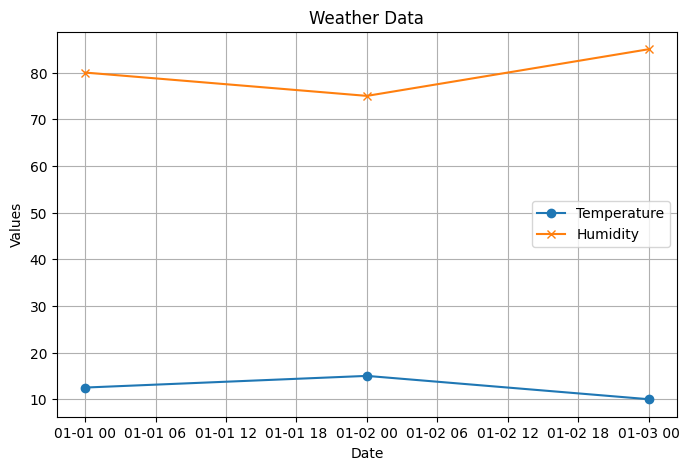

In [ ]:
import matplotlib.pyplot as plt

# Plot Temperature and Humidity
plt.figure(figsize=(8, 5))
plt.plot(pd.to_datetime(df["Date"]), df["Temperature"], label="Temperature", marker='o')
plt.plot(pd.to_datetime(df["Date"]), df["Humidity"], label="Humidity", marker='x')
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Weather Data")
plt.legend()
plt.grid()
plt.show()

## 4. Xarray: Working with Multidimensional Meteorological Data
**Xarray** is a powerful library for working with labeled multi-dimensional arrays, commonly used for meteorological and oceanographic datasets.

### Key Features:
- Labeled dimensions and coordinates for clear data understanding.
- Easy slicing, grouping, and statistical computations.
- Integration with visualization libraries like Matplotlib.

### Example: Loading and Visualizing a NetCDF File

The file 'output_filename.nc' already exists. Skipping download.
Dataset properties:
<xarray.Dataset> Size: 2GB
Dimensions:    (longitude: 2048, latitude: 1536, p: 18, t: 11)
Coordinates:
  * longitude  (longitude) float32 8kB 0.08789 0.2637 0.4395 ... 359.7 359.9
  * latitude   (latitude) float32 6kB -89.94 -89.82 -89.71 ... 89.71 89.82 89.94
  * p          (p) float32 72B 1e+03 950.0 925.0 850.0 ... 50.0 30.0 20.0 10.0
  * t          (t) datetime64[ns] 88B 2024-12-01 2024-12-02 ... 2024-12-11
Data variables:
    temp       (t, p, latitude, longitude) float32 2GB ...
Attributes:
    history:  Fri Dec  6 16:48:34 IST 2024 - XCONV V1.93 13-October-2015

Dimensions: FrozenMappingWarningOnValuesAccess({'longitude': 2048, 'latitude': 1536, 'p': 18, 't': 11})

Coordinates: Coordinates:
  * longitude  (longitude) float32 8kB 0.08789 0.2637 0.4395 ... 359.7 359.9
  * latitude   (latitude) float32 6kB -89.94 -89.82 -89.71 ... 89.71 89.82 89.94
  * p          (p) float32 72B 1e+03 950.0 925.0 8

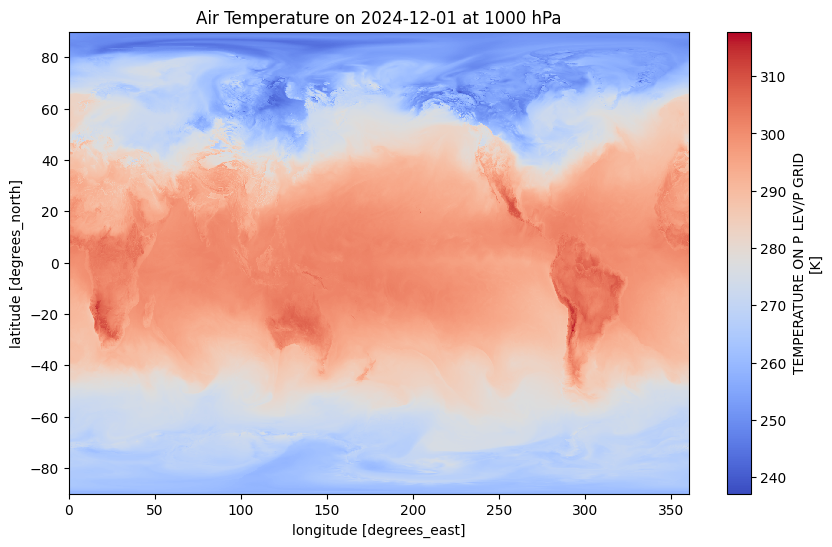

In [13]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import gdown

# File ID for the Google Drive link
file_id = '12ZWELUJG0W5Y8a1LI3w4gsSjKtLQjOOQ'

# Define the output file name
output_file = 'temp.nc'  # Assuming the file is a NetCDF (.nc) file

# Check if the file already exists
if not os.path.exists(output_file):
    # File doesn't exist, so download it
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    gdown.download(url, output_file, quiet=False)
else:
    print(f"The file '{output_file}' already exists. Skipping download.")

# Open the NetCDF data using xarray
data = xr.open_dataset(output_file)

# Inspect the dataset's properties
print("Dataset properties:")
print(data)

# Show available dimensions, coordinates, and variables
print("\nDimensions:", data.dims)
print("\nCoordinates:", data.coords)
print("\nVariables:", data.data_vars)


# Check if 'temp' exists in the dataset
if 'temp' in data.data_vars:
    air_temp = data['temp']  # Load the air temperature variable (change 'air' to the correct variable name)

    # Select data for a specific datetime (e.g., 2024-12-01)
    time_slice = air_temp.sel(t="2024-12-01")  # Change the date to your desired time

    # Check if pressure levels exist and slice for a specific pressure (e.g., 1000 hPa)
    if 'p' in data.coords:
        pressure_level = 1000  # Adjust the pressure level as needed
        time_slice_at_pressure = time_slice.sel(p=pressure_level, method="nearest")

        # Plot the data as an image (using xarray's plot method)
        plt.figure(figsize=(10, 6))
        time_slice_at_pressure.plot(cmap="coolwarm")
        plt.title(f"Air Temperature on 2024-12-01 at {pressure_level} hPa")
        plt.show()
    else:
        print("Pressure coordinate not found in the dataset.")
else:
    print("Temperature variable 'temp' not found in the dataset.")


## Xarray: Working with Multidimensional Meteorological Data
**Xarray** is a powerful library for working with labeled multi-dimensional arrays, commonly used for meteorological and oceanographic datasets.

### Key Features:
- Labeled dimensions and coordinates for clear data understanding.
- Easy slicing, grouping, and statistical computations.
- Integration with visualization libraries like Matplotlib.

### Example: Loading and Visualizing a NetCDF File. Focusing on India's Geographic Bounds: I’ve set the latitude and longitude limits to focus on the region of India:

### Latitude: 6°N to 37°N
###Longitude: 68°E to 97°E

The file 'output_filename.nc' already exists. Skipping download.
Dataset properties:
<xarray.Dataset> Size: 2GB
Dimensions:    (longitude: 2048, latitude: 1536, p: 18, t: 11)
Coordinates:
  * longitude  (longitude) float32 8kB 0.08789 0.2637 0.4395 ... 359.7 359.9
  * latitude   (latitude) float32 6kB -89.94 -89.82 -89.71 ... 89.71 89.82 89.94
  * p          (p) float32 72B 1e+03 950.0 925.0 850.0 ... 50.0 30.0 20.0 10.0
  * t          (t) datetime64[ns] 88B 2024-12-01 2024-12-02 ... 2024-12-11
Data variables:
    temp       (t, p, latitude, longitude) float32 2GB ...
Attributes:
    history:  Fri Dec  6 16:48:34 IST 2024 - XCONV V1.93 13-October-2015

Dimensions: FrozenMappingWarningOnValuesAccess({'longitude': 2048, 'latitude': 1536, 'p': 18, 't': 11})

Coordinates: Coordinates:
  * longitude  (longitude) float32 8kB 0.08789 0.2637 0.4395 ... 359.7 359.9
  * latitude   (latitude) float32 6kB -89.94 -89.82 -89.71 ... 89.71 89.82 89.94
  * p          (p) float32 72B 1e+03 950.0 925.0 8

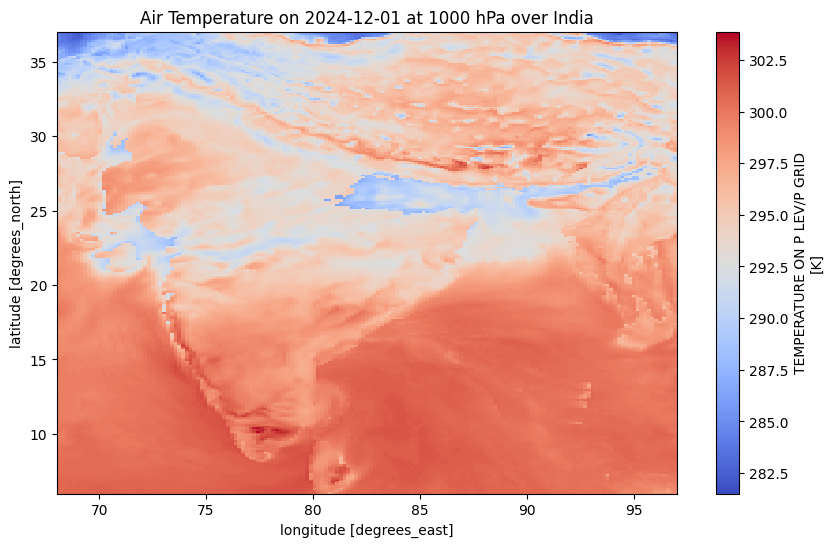

In [16]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import gdown

file_id = '12ZWELUJG0W5Y8a1LI3w4gsSjKtLQjOOQ'

output_file = 'temp.nc'  # Assuming the file is a NetCDF (.nc) file

# Check if the file already exists
if not os.path.exists(output_file):
    # File doesn't exist, so download it
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    gdown.download(url, output_file, quiet=False)
else:
    print(f"The file '{output_file}' already exists. Skipping download.")

# Open the NetCDF data using xarray
data = xr.open_dataset(output_file)

# Inspect the dataset's properties
print("Dataset properties:")
print(data)

# Show available dimensions, coordinates, and variables
print("\nDimensions:", data.dims)
print("\nCoordinates:", data.coords)
print("\nVariables:", data.data_vars)

# Check if 'temp' exists in the dataset
if 'temp' in data.data_vars:
    air_temp = data['temp']  # Load the air temperature variable (change 'temp' to the correct variable name)

    # Select data for a specific datetime (e.g., 2024-12-01)
    time_slice = air_temp.sel(t="2024-12-01")  # Change the date to your desired time

    # Focus on India by selecting latitudes and longitudes
    lat_min, lat_max = 6, 37  # Latitude bounds for India
    lon_min, lon_max = 68, 97  # Longitude bounds for India

    # Check if the latitude and longitude coordinates exist
    if 'latitude' in data.coords and 'longitude' in data.coords:
        india_slice = time_slice.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

        # Check if pressure levels exist and slice for a specific pressure (e.g., 1000 hPa)
        if 'p' in data.coords:
            pressure_level = 1000  # Adjust the pressure level as needed
            india_slice_at_pressure = india_slice.sel(p=pressure_level, method="nearest")

            # Plot the data as an image (using xarray's plot method)
            plt.figure(figsize=(10, 6))
            india_slice_at_pressure.plot(cmap="coolwarm")
            plt.title(f"Air Temperature on 2024-12-01 at {pressure_level} hPa over India")
            plt.show()
        else:
            print("Pressure coordinate not found in the dataset.")
    else:
        print("Latitude or Longitude coordinate not found in the dataset.")
else:
    print("Temperature variable 'temp' not found in the dataset.")


# Working with Raster Data in Google Colab using GDAL

## 1. **Installing GDAL in Colab**

GDAL (Geospatial Data Abstraction Library) is a popular library used for reading, writing, and manipulating geospatial raster and vector data. It supports a variety of formats like GeoTIFF, HDF5, NetCDF, and many others.

### Benefits of Using GDAL:
- **Format Support**: GDAL can handle a wide range of geospatial data formats (e.g., GeoTIFF, NetCDF, shapefiles).
- **Raster Data Processing**: Efficiently processes and manipulates raster datasets (e.g., satellite imagery, elevation models).
- **Geospatial Transformation**: GDAL allows reprojecting, resampling, and transforming spatial data.
- **Integration**: GDAL integrates well with other libraries like `NumPy`, `Matplotlib`, and `Rasterio` for further analysis and visualization.

### Why Use GDAL?
- **Data Compatibility**: It ensures you can work with different geospatial data formats.
- **Efficiency**: Offers high performance for large raster and vector datasets.
- **Comprehensive Tools**: Provides powerful utilities for spatial analysis, geoprocessing, and map algebra.


The file 'test.tif' already exists. Skipping download.
Raster Properties for: test.tif
Driver: GTiff - GeoTIFF
Projection: PROJCS["WGS 84 / UTM zone 43N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32643"]]
Geotransform: (256785.0, 30.0, 0.0, 2832915.0, 0.0, -30.0)
Dimensions: 7671 x 7821 (Width x Height)
Number of Bands: 3

Band 1:
  Data Type: Byte
  No Data Value: None
  Min/Max Value: 0.0, 160.0
  Band 1 Size (in pixels): 7671 x 7821

Band 2:
  Data Type: Byte
  No Data Value: 

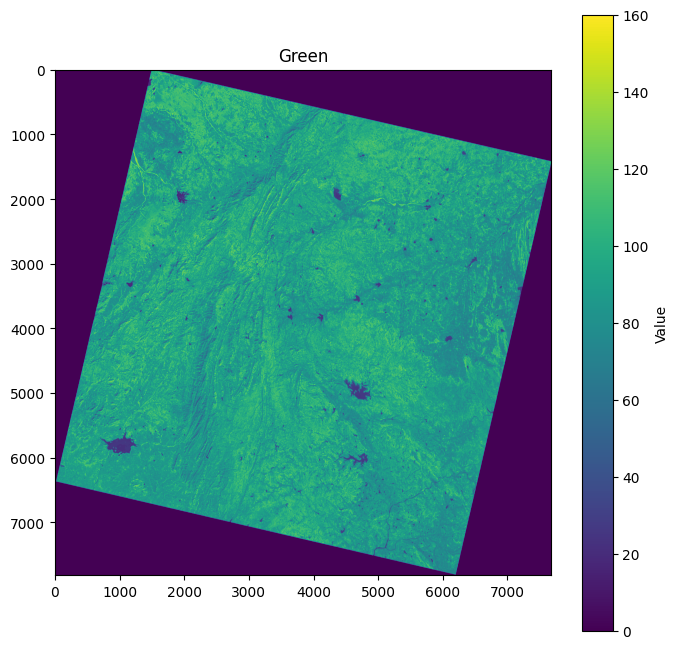

In [22]:
from osgeo import gdal
import numpy as np
import os
import matplotlib.pyplot as plt
import gdown

file_id = '1lh_g787q106sXQj_QIMH2eHUNqVOor9l'

output_file = 'test.tif'  # Assuming the file is a NetCDF (.nc) file

# Check if the file already exists
if not os.path.exists(output_file):
    # File doesn't exist, so download it
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    gdown.download(url, output_file, quiet=False)
else:
    print(f"The file '{output_file}' already exists. Skipping download.")


# Open the raster file
raster = gdal.Open(output_file)

# Check if the raster opened successfully
if not raster:
    print(f"Failed to open the raster file: {output_file}")
    exit(1)

# Get basic properties of the raster
driver = raster.GetDriver()  # The driver that created the raster
projection = raster.GetProjection()  # Projection information
geotransform = raster.GetGeoTransform()  # Georeferencing information

# Get raster dimensions
width = raster.RasterXSize
height = raster.RasterYSize
num_bands = raster.RasterCount

# Display the raster properties
print(f"Raster Properties for: {output_file}")
print(f"Driver: {driver.ShortName} - {driver.LongName}")
print(f"Projection: {projection}")
print(f"Geotransform: {geotransform}")
print(f"Dimensions: {width} x {height} (Width x Height)")
print(f"Number of Bands: {num_bands}")

for i in range(1, num_bands + 1):
    band = raster.GetRasterBand(i)
    print(f"\nBand {i}:")
    print(f"  Data Type: {gdal.GetDataTypeName(band.DataType)}")
    print(f"  No Data Value: {band.GetNoDataValue()}")
    print(f"  Min/Max Value: {band.GetMinimum()}, {band.GetMaximum()}")
    print(f"  Band {i} Size (in pixels): {band.XSize} x {band.YSize}")


# Read and visualize the raster
band = raster.GetRasterBand(1)
array = band.ReadAsArray()

plt.figure(figsize=(8, 8))
plt.imshow(array, cmap="viridis")
plt.colorbar(label="Value")
plt.title("Green")
plt.show()

The file 'test.tif' already exists. Skipping download.
Number of bands: 3


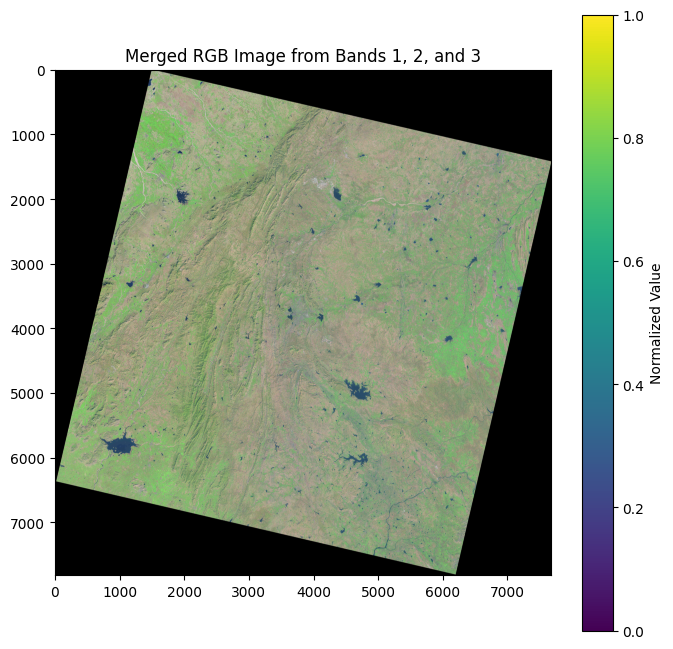

In [20]:
from osgeo import gdal
import numpy as np
import os
import matplotlib.pyplot as plt
import gdown

# File ID from Google Drive
file_id = '1lh_g787q106sXQj_QIMH2eHUNqVOor9l'
output_file = 'test.tif'  # Assuming the file is a multi-band raster file (e.g., GeoTIFF)

# Check if the file already exists
if not os.path.exists(output_file):
    # File doesn't exist, so download it
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    gdown.download(url, output_file, quiet=False)
else:
    print(f"The file '{output_file}' already exists. Skipping download.")

# Open the raster file
raster = gdal.Open(output_file)

# Get the number of bands in the raster
num_bands = raster.RasterCount
print(f"Number of bands: {num_bands}")

# Check if the raster has at least 3 bands
if num_bands < 3:
    print("Warning: The raster does not have 3 or more bands.")
    exit(1)

# Read the first three bands
band1 = raster.GetRasterBand(1).ReadAsArray()  # Band 1 (Red)
band2 = raster.GetRasterBand(2).ReadAsArray()  # Band 2 (Green)
band3 = raster.GetRasterBand(3).ReadAsArray()  # Band 3 (Blue)

# Normalize the bands to the range [0, 1] for better visualization
band1_norm = (band1 - np.min(band1)) / (np.max(band1) - np.min(band1))
band2_norm = (band2 - np.min(band2)) / (np.max(band2) - np.min(band2))
band3_norm = (band3 - np.min(band3)) / (np.max(band3) - np.min(band3))

# Create an RGB image from the first three normalized bands
rgb_image = np.stack([band1_norm, band2_norm, band3_norm], axis=-1)

# Plot the RGB image
plt.figure(figsize=(8, 8))
plt.imshow(rgb_image)
plt.title("Merged RGB Image from Bands 1, 2, and 3")
plt.colorbar(label="Normalized Value")
plt.show()


## 6. Meteogram Example
A meteogram provides a graphical summary of weather data for a location.

### Example:

<ipython-input-10-97382683ab61>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time = pd.date_range("2024-01-01", periods=10, freq="H")


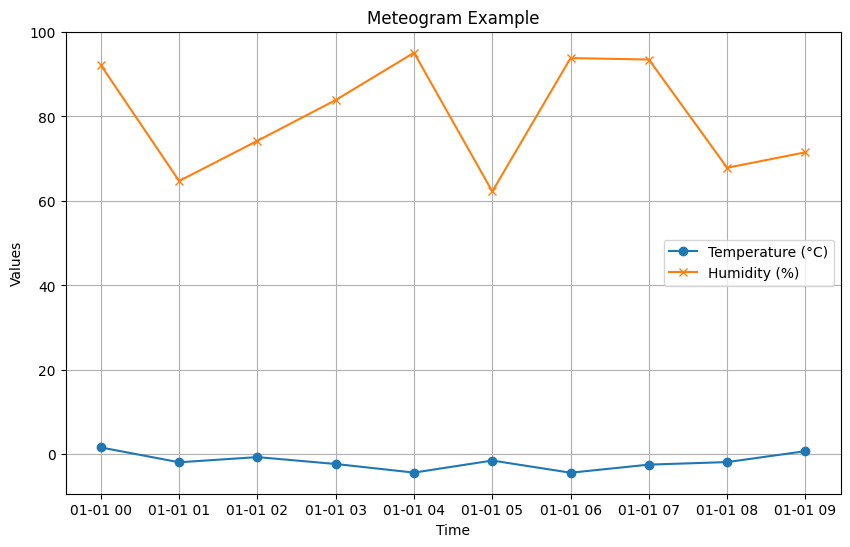

In [ ]:
time = pd.date_range("2024-01-01", periods=10, freq="H")
temperature = np.random.uniform(-5, 5, size=10)  # Random temperatures
humidity = np.random.uniform(50, 100, size=10)   # Random humidity

plt.figure(figsize=(10, 6))
plt.plot(time, temperature, label="Temperature (°C)", marker="o")
plt.plot(time, humidity, label="Humidity (%)", marker="x")
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Meteogram Example")
plt.legend()
plt.grid()
plt.show()

### Machine Learning/start here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [ ]:
time_steps=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
temperature_pattern=np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
model_temperature = np.array([0.9, 2.1, 3.1, 3.1, 5.1, 7.1, 6.1, 8.1, 9.1, 10.1])
obs_temperature = np.array([1.01, 2.51, 3.61, 4.31, 5.01, 6.19, 7.13, 8.12, 9.16, 10.17])


noice_model=np.random.normal(0, .7, len(time_steps))
noice_obs=np.random.normal(0, .5, len(time_steps))

model_temperature = temperature_pattern + noice_model
obs_temperature = temperature_pattern + noice_obs

print (model_temperature)
print(obs_temperature)
print(time_steps)
print(temperature_pattern)

print (model_temperature)
print(obs_temperature)
plt.figure(figsize=(10, 5))
plt.plot(time_steps, temperature_pattern, label='Temperature Pattern', color='yellow')
plt.plot(time_steps, model_temperature, label='Model Prediction', color='blue')
plt.plot(time_steps, obs_temperature, label='Observed Temperature', color='red')
plt.title('Synthetic Temperature for Delhi')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions - train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1
        self.loss = []
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')
        ax.set_ylim(0, max(train_output) + 1)
        itrn=0
        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}, ".format(frame + 1, cost))
            return line,
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')
        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()
        return self.parameters, self.loss

def evaluate_model(predictions, actual_values):
    mse = np.mean((predictions - actual_values) ** 2)
    mae = np.mean(np.abs(predictions - actual_values))
    rmse = np.sqrt(mse)
    ss_total = np.sum((actual_values - np.mean(actual_values)) ** 2)
    ss_residual = np.sum((actual_values - predictions) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    n = len(actual_values)
    k = 1
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
    return mse, mae, rmse, r_squared, adj_r_squared

model = LinearRegression()
parameters, loss = model.train(model_temperature, obs_temperature, learning_rate=0.01, iters=10)
predictions = model.forward_propagation(model_temperature)
mse, mae, rmse, r_squared, adj_r_squared = evaluate_model(predictions, obs_temperature)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adj_r_squared)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
max_temperature = 10
min_temperature = 5
no_of_days = 100
time_steps = np.arange(0, no_of_days, 1)

amplitude = (max_temperature - min_temperature) / 2
midpoint = (max_temperature + min_temperature) / 2
temperature_pattern = amplitude * np.sin(time_steps * np.pi / 10) + midpoint

noise_model = np.random.normal(0, 0.7, len(time_steps))
noise_obs = np.random.normal(0, 0.5, len(time_steps))

model_temperature = temperature_pattern + noise_model
obs_temperature = temperature_pattern + noise_obs

noise_overfit = np.random.normal(0, 5.0, len(time_steps))
obs_temperature_overfit = temperature_pattern + noise_overfit

plt.figure(figsize=(10, 5))
plt.plot(time_steps, temperature_pattern, label='Temperature Pattern', color='yellow')
plt.plot(time_steps, model_temperature, label='Model Prediction', color='blue')
plt.plot(time_steps, obs_temperature, label='Observed Temperature', color='red')
plt.title('Synthetic Temperature for Delhi')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
X = time_steps.reshape(-1, 1)
y = obs_temperature

normal_model = LinearRegression()
underfitting_model = LinearRegression()
overfitting_model = LinearRegression()

normal_model.fit(X[:30], y[:30])
underfitting_model.fit(X[:5], y[:5])
overfitting_model.fit(X, obs_temperature_overfit)

x_vals = np.linspace(min(time_steps), max(time_steps), 100).reshape(-1, 1)

def data_assimilation(model, x_vals, observations, assimilation_factor=0.5):
    predictions = model.predict(x_vals)
    corrected_predictions = []
    for i in range(len(predictions)):
        corrected_value = predictions[i] + assimilation_factor * (observations[i] - predictions[i])
        corrected_predictions.append(corrected_value)
    return np.array(corrected_predictions)

normal_assimilated = data_assimilation(normal_model, x_vals, obs_temperature)
underfitting_assimilated = data_assimilation(underfitting_model, x_vals, obs_temperature)
overfitting_assimilated = data_assimilation(overfitting_model, x_vals, obs_temperature_overfit)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.scatter(time_steps, obs_temperature, marker='o', color='red', label='Observed Temperature')
ax1.plot(x_vals, normal_model.predict(x_vals), color='blue', label='Normal Learning')
ax1.set_title('Normal Learning (Good Fit)')
ax1.set_ylim(0, max(obs_temperature) + 2)
ax1.set_xlim(min(time_steps) - 1, max(time_steps) + 1)
ax1.set_xlabel('Time Steps (Days)')
ax1.set_ylabel('Temperature (°C)')
ax1.legend()

ax2.scatter(time_steps, obs_temperature, marker='o', color='red', label='Observed Temperature')
ax2.plot(x_vals, underfitting_model.predict(x_vals), color='orange', label='Underfitting')
ax2.set_title('Underfitting (Too Few Data Points)')
ax2.set_ylim(0, max(obs_temperature) + 2)
ax2.set_xlim(min(time_steps) - 1, max(time_steps) + 1)
ax2.set_xlabel('Time Steps (Days)')
ax2.set_ylabel('Temperature (°C)')
ax2.legend()

ax3.scatter(time_steps, obs_temperature_overfit, marker='o', color='red', label='Observed Temperature (with Noise)')
ax3.plot(x_vals, overfitting_model.predict(x_vals), color='green', label='Overfitting')
ax3.set_title('Overfitting (More Noise)')
ax3.set_ylim(0, max(obs_temperature_overfit) + 2)
ax3.set_xlim(min(time_steps) - 1, max(time_steps) + 1)
ax3.set_xlabel('Time Steps (Days)')
ax3.set_ylabel('Temperature (°C)')
ax3.legend()

plt.tight_layout()
plt.show()

In [ ]:
normal_mse = mean_squared_error(obs_temperature, normal_model.predict(X[:len(obs_temperature)]))
underfitting_mse = mean_squared_error(obs_temperature[:5], underfitting_model.predict(X[:5]))
overfitting_mse = mean_squared_error(obs_temperature_overfit, overfitting_model.predict(X))

normal_mse_assim = mean_squared_error(obs_temperature, normal_assimilated)
underfitting_mse_assim = mean_squared_error(obs_temperature[:5], underfitting_assimilated[:5])
overfitting_mse_assim = mean_squared_error(obs_temperature_overfit, overfitting_assimilated)

print(f"Normal Model MSE (Non-Assimilated): {normal_mse}")
print(f"Underfitting Model MSE (Non-Assimilated): {underfitting_mse}")
print(f"Overfitting Model MSE (Non-Assimilated): {overfitting_mse}")

print(f"Normal Model MSE (Assimilated): {normal_mse_assim}")
print(f"Underfitting Model MSE (Assimilated): {underfitting_mse_assim}")
print(f"Overfitting Model MSE (Assimilated): {overfitting_mse_assim}")

plt.figure(figsize=(10, 6))
plt.plot(time_steps, obs_temperature, 'ro', label='Observed Temperature')
plt.plot(x_vals, normal_assimilated, label='Normal Model (Assimilated)', color='blue')
plt.plot(x_vals, underfitting_assimilated, label='Underfitting Model (Assimilated)', color='orange')
plt.plot(x_vals, overfitting_assimilated, label='Overfitting Model (Assimilated)', color='green')
plt.title('Data Assimilation Results')
plt.xlabel('Time Steps (Days)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


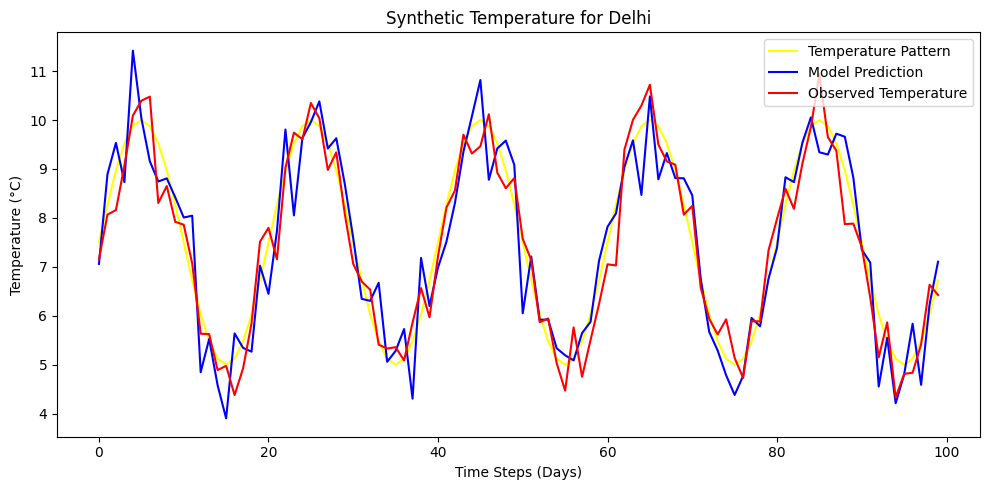

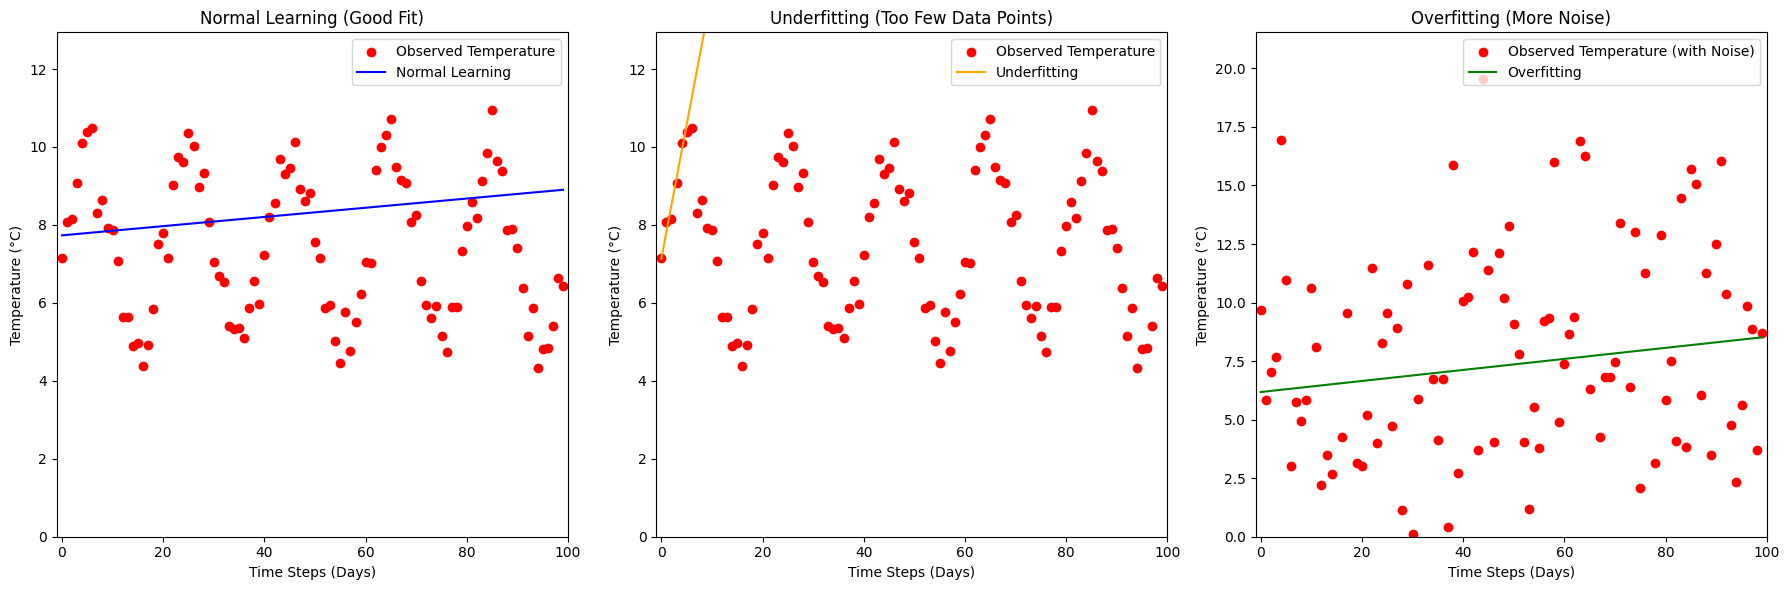

Normal Model MSE (Non-Assimilated): 4.35772219843161
Underfitting Model MSE (Non-Assimilated): 0.04845278455570732
Overfitting Model MSE (Non-Assimilated): 22.122381433069606
Normal Model MSE (Assimilated): 1.0894305496079024
Underfitting Model MSE (Assimilated): 0.012113196138926913
Overfitting Model MSE (Assimilated): 5.5305953582674015


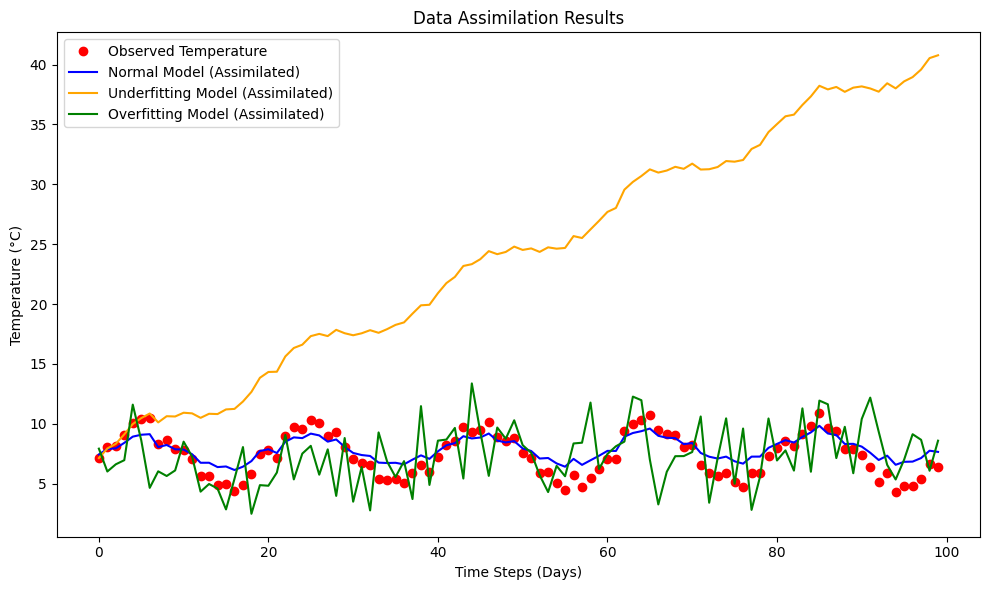

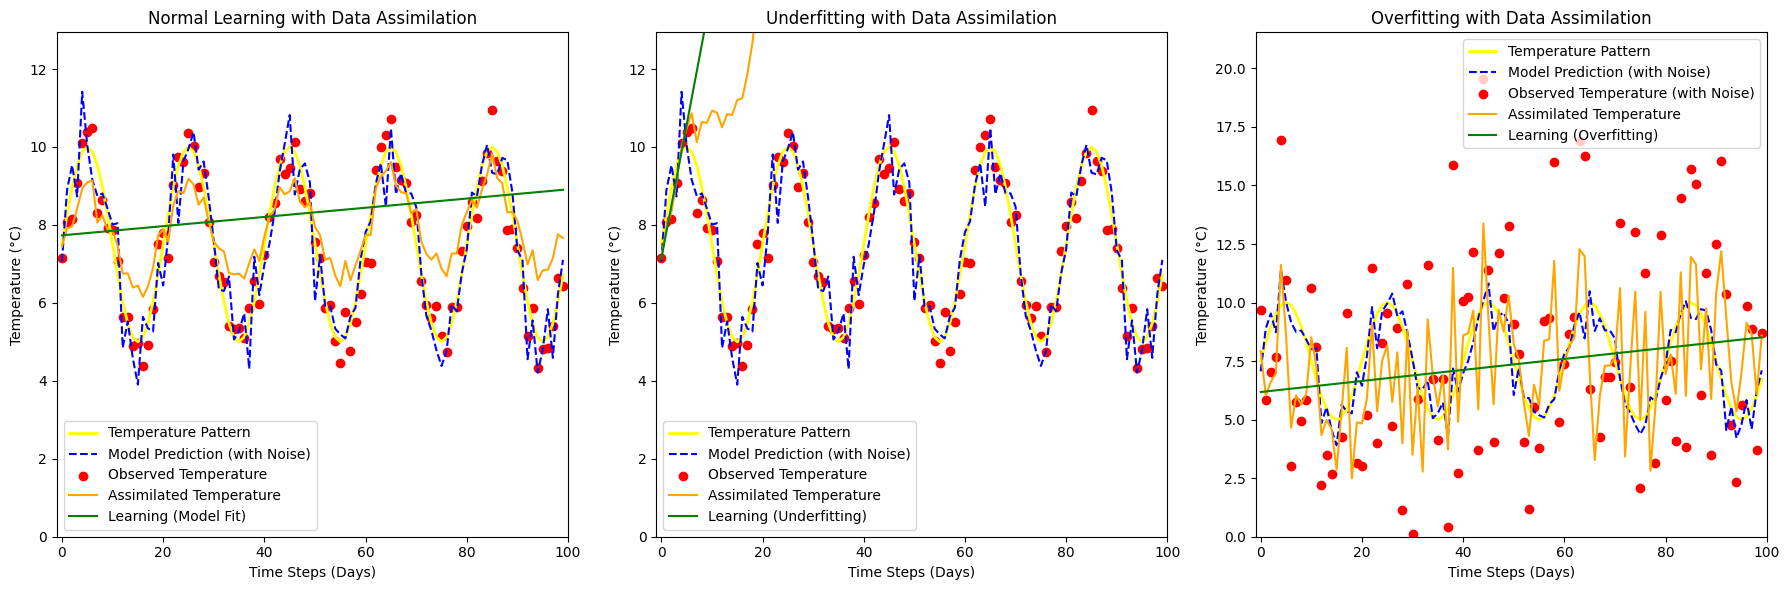

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.plot(time_steps, temperature_pattern, label='Temperature Pattern', color='yellow', linewidth=2)
ax1.plot(time_steps, model_temperature, label='Model Prediction (with Noise)', color='blue', linestyle='--')
ax1.scatter(time_steps, obs_temperature, marker='o', color='red', label='Observed Temperature')
ax1.plot(x_vals, normal_assimilated, color='orange', label='Assimilated Temperature')
ax1.plot(x_vals, normal_model.predict(x_vals), color='green', label='Learning (Model Fit)')

ax1.set_title('Normal Learning with Data Assimilation')
ax1.set_ylim(0, max(obs_temperature) + 2)
ax1.set_xlim(min(time_steps) - 1, max(time_steps) + 1)
ax1.set_xlabel('Time Steps (Days)')
ax1.set_ylabel('Temperature (°C)')
ax1.legend()

ax2.plot(time_steps, temperature_pattern, label='Temperature Pattern', color='yellow', linewidth=2)
ax2.plot(time_steps, model_temperature, label='Model Prediction (with Noise)', color='blue', linestyle='--')
ax2.scatter(time_steps, obs_temperature, marker='o', color='red', label='Observed Temperature')
ax2.plot(x_vals, underfitting_assimilated, color='orange', label='Assimilated Temperature')
ax2.plot(x_vals, underfitting_model.predict(x_vals), color='green', label='Learning (Underfitting)')

ax2.set_title('Underfitting with Data Assimilation')
ax2.set_ylim(0, max(obs_temperature) + 2)
ax2.set_xlim(min(time_steps) - 1, max(time_steps) + 1)
ax2.set_xlabel('Time Steps (Days)')
ax2.set_ylabel('Temperature (°C)')
ax2.legend()

ax3.plot(time_steps, temperature_pattern, label='Temperature Pattern', color='yellow', linewidth=2)
ax3.plot(time_steps, model_temperature, label='Model Prediction (with Noise)', color='blue', linestyle='--')
ax3.scatter(time_steps, obs_temperature_overfit, marker='o', color='red', label='Observed Temperature (with Noise)')
ax3.plot(x_vals, overfitting_assimilated, color='orange', label='Assimilated Temperature')
ax3.plot(x_vals, overfitting_model.predict(x_vals), color='green', label='Learning (Overfitting)')

ax3.set_title('Overfitting with Data Assimilation')
ax3.set_ylim(0, max(obs_temperature_overfit) + 2)
ax3.set_xlim(min(time_steps) - 1, max(time_steps) + 1)
ax3.set_xlabel('Time Steps (Days)')
ax3.set_ylabel('Temperature (°C)')
ax3.legend()

plt.tight_layout()
plt.show()
